In [1]:
import spatialdata as sd
import spatialdata_plot

/home/stefar/Documents/Spatial Transcriptomic/.venv/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/home/stefar/Documents/Spatial Transcriptomic/.venv/lib/python3.11/site-packages/xarray_schema/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


In [2]:
data_path = "data/blocco1_sham"
sdata = sd.read_zarr(data_path)
sdata

/tmp/ipykernel_4932/2511088221.py:2: UserWarning: SpatialData is not stored in the most current format. If you want to use Zarr v3, please write the store to a new location using `sdata.write()`.
  sdata = sd.read_zarr(data_path)


/home/stefar/Documents/Spatial Transcriptomic/.venv/lib/python3.11/site-packages/zarr/core/group.py:3535: ZarrUserWarning: Object at zmetadata is not recognized as a component of a Zarr hierarchy.
  warnings.warn(


SpatialData object, with associated Zarr store: /home/stefar/Documents/Spatial Transcriptomic/data/blocco1_sham
├── Images
│     ├── 'blocco1_hires_image': DataArray[cyx] (3, 1849, 4270)
│     ├── 'blocco1_lowres_image': DataArray[cyx] (3, 185, 427)
│     └── 'fluo_image': DataTree[cyx] (3, 7000, 16166), (3, 3500, 8083), (3, 1750, 4041), (3, 875, 2020)
├── Shapes
│     ├── 'GFP_poly': GeoDataFrame shape: (2, 5) (2D shapes)
│     ├── 'blocco1_square_008um': GeoDataFrame shape: (171116, 2) (2D shapes)
│     ├── 'blocco1_square_016um': GeoDataFrame shape: (44363, 1) (2D shapes)
│     ├── 'intissue_008um': GeoDataFrame shape: (95232, 3) (2D shapes)
│     └── 'intissue_poly': GeoDataFrame shape: (1, 5) (2D shapes)
└── Tables
      ├── 'filtered': AnnData (95232, 32285)
      ├── 'final_table': AnnData (95514, 32285)
      ├── 'square_008um': AnnData (95514, 32285)
      └── 'square_016um': AnnData (44363, 32285)
with coordinate systems:
    ▸ 'blocco1', with elements:
        blocco1_hires_

In [3]:
import matplotlib.pyplot as plt

/home/stefar/Documents/Spatial Transcriptomic/.venv/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:178: UserWarning: The table is annotating 'intissue_008um', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


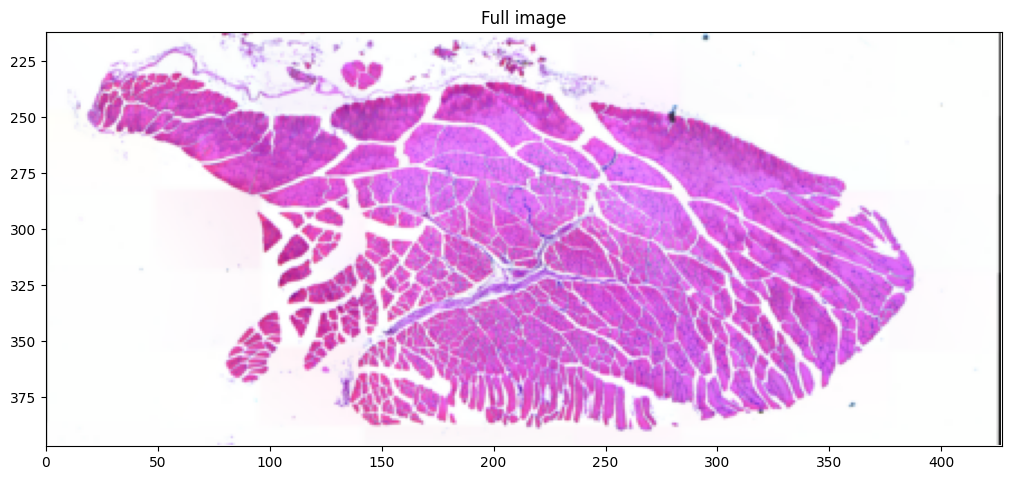

In [12]:
#plot the data
sdata.pl.render_images("blocco1_lowres_image").pl.show(coordinate_systems = "blocco1_downscaled_lowres", title="Full image", figsize=(10,10))


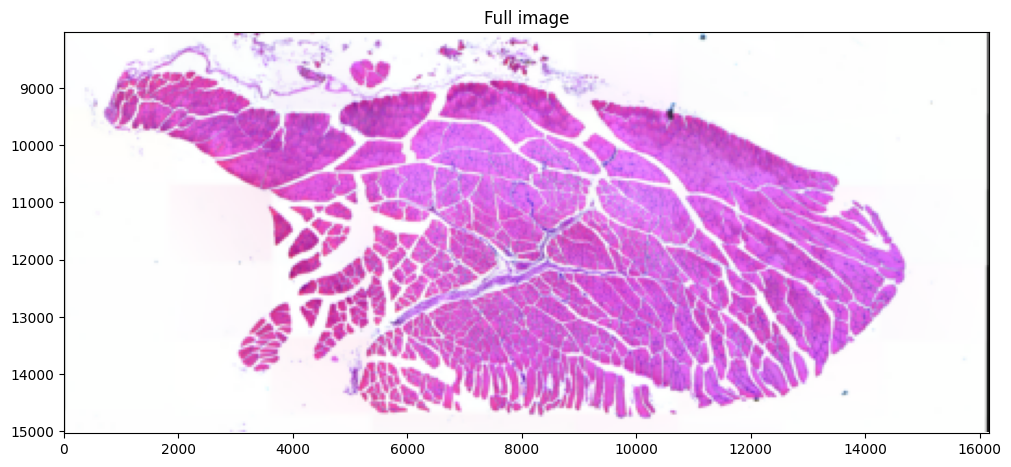

In [5]:
#plot the data
sdata.pl.render_images("blocco1_lowres_image").pl.show(coordinate_systems = "blocco1", title="Full image", figsize=(10,10))


In [7]:
#adesso cerchiamo i differentisistemi di coordinate
from spatialdata.transformations import get_transformation


In [14]:
sdata.shapes["blocco1_square_016um"]

,geometry
location_id,
66564,"POLYGON ((16210.664 8043.85, 16210.664 7993.18..."
66565,"POLYGON ((16160.028 8042.249, 16160.028 7991.5..."
66566,"POLYGON ((16109.391 8040.647, 16109.391 7989.9..."
66567,"POLYGON ((16058.754 8039.045, 16058.754 7988.3..."
66568,"POLYGON ((16008.118 8037.444, 16008.118 7986.7..."
...,...
127762,"POLYGON ((226.387 15038.789, 226.387 14988.127..."
127763,"POLYGON ((175.756 15037.186, 175.756 14986.525..."
127764,"POLYGON ((125.126 15035.584, 125.126 14984.922..."


In [23]:
# Prendiamo l'elemento dei quadratini
shapes_008um = sdata.shapes["blocco1_square_008um"]

# Estraiamo la trasformazione verso il sistema lowres
transform = get_transformation(shapes_008um, "blocco1_downscaled_lowres")

print(f"Tipo di trasformazione: {type(transform)}")
print("Matrice di trasformazione:")
print(transform)
#vediamo di quanto viene ri scalata l' immagine, ogni pixel (x,y) viene moltiplicato per questi
#valori in modo da avere l'immagine coerente in termini di locazione spaziale

Tipo di trasformazione: <class 'spatialdata.transformations.transformations.Scale'>
Matrice di trasformazione:
Scale (x, y)
    [0.02641078 0.02641078]


In [48]:

# Definiamo i limiti del rettangolo (min_x, min_y, max_x, max_y)
# Nota: sostituisci questi valori con quelli reali della tua area di interesse
min_x, min_y = 8000, 13500
max_x, max_y = 8500, 14000

# Eseguiamo il crop
# 'target_coordinate_system' dice al software in quale "lingua" sono scritti i numeri sopra
sdata_cropped = sdata.query.bounding_box(
    min_coordinate=[min_x, min_y],
    max_coordinate=[max_x, max_y],
    axes=("x","y"),
    target_coordinate_system='blocco1',
    filter_table=True
)

In [18]:
""""
per far si fare lo stesso crop anche nell'immagine rispetto ad un sistema di coordinate diverso
dobbiamo ottenere il fattore di scala da un sistema di coordinate di partenza ad un'altro
vedi 2 celle sopra, dove dal sistema di coordinate in cui sono definiti i bins viene ottenuto il 
fattore di scale per il quale ogni vertice dei bins dev'essere moltiplicato in modo che cadino nella stessa
porzione di immagine 
"""

# Definiamo i limiti del rettangolo (min_x, min_y, max_x, max_y)
# Nota: sostituisci questi valori con quelli reali della tua area di interesse
min_x, min_y = 8000*0.026, 13500*0.026 #moltiplico per fattore di scala
max_x, max_y = 8500*0.026, 14000*0.026

# Eseguiamo il crop
# 'target_coordinate_system' dice al software in quale "lingua" sono scritti i numeri sopra
sdata_cropped_down = sdata.query.bounding_box(
    min_coordinate=[min_x, min_y],
    max_coordinate=[max_x, max_y],
    axes=("x","y"),
    target_coordinate_system='blocco1_downscaled_lowres',
)


In [39]:
# Guarda i limiti (extent) di un elemento per capire che numeri usare
#qui ho usato coordinate system="blocco1_downscaled_lowres"
from spatialdata import get_extent

extent = get_extent(sdata.shapes["blocco1_square_008um"], coordinate_system="blocco1_downscaled_lowres")
print(extent)

{'x': (np.float64(-0.6676602285733256), np.float64(427.6247880722846)), 'y': (np.float64(210.61792915209173), np.float64(396.8300021738035))}


In [21]:
sdata_cropped

SpatialData object
├── Images
│     ├── 'blocco1_hires_image': DataArray[cyx] (3, 133, 132)
│     ├── 'blocco1_lowres_image': DataArray[cyx] (3, 13, 13)
│     └── 'fluo_image': DataTree[cyx] (3, 500, 500), (3, 250, 250), (3, 125, 125), (3, 63, 62)
├── Shapes
│     ├── 'blocco1_square_008um': GeoDataFrame shape: (424, 2) (2D shapes)
│     ├── 'blocco1_square_016um': GeoDataFrame shape: (121, 1) (2D shapes)
│     ├── 'intissue_008um': GeoDataFrame shape: (424, 3) (2D shapes)
│     └── 'intissue_poly': GeoDataFrame shape: (1, 5) (2D shapes)
└── Tables
      ├── 'filtered': AnnData (424, 32285)
      ├── 'final_table': AnnData (424, 32285)
      ├── 'square_008um': AnnData (424, 32285)
      └── 'square_016um': AnnData (121, 32285)
with coordinate systems:
    ▸ 'blocco1', with elements:
        blocco1_hires_image (Images), blocco1_lowres_image (Images), fluo_image (Images), blocco1_square_008um (Shapes), blocco1_square_016um (Shapes), intissue_008um (Shapes), intissue_poly (Shapes)
    ▸

In [22]:
sdata_cropped_down

SpatialData object
├── Images
│     └── 'blocco1_lowres_image': DataArray[cyx] (3, 13, 13)
├── Shapes
│     ├── 'blocco1_square_008um': GeoDataFrame shape: (418, 2) (2D shapes)
│     └── 'blocco1_square_016um': GeoDataFrame shape: (116, 1) (2D shapes)
└── Tables
      └── 'square_016um': AnnData (116, 32285)
with coordinate systems:
    ▸ 'blocco1', with elements:
        blocco1_lowres_image (Images), blocco1_square_008um (Shapes), blocco1_square_016um (Shapes)
    ▸ 'blocco1_downscaled_hires', with elements:
        blocco1_square_008um (Shapes), blocco1_square_016um (Shapes)
    ▸ 'blocco1_downscaled_lowres', with elements:
        blocco1_lowres_image (Images), blocco1_square_008um (Shapes), blocco1_square_016um (Shapes)

Dopo questa studio dei diversi sistemi di coordinate e la loro gestione, notiamo una cosa che non riesco a spiegare del tutto, ossia che sdata_cropped e sdata_cropped_down dovrebbere avere entrambi gli stessi oggetti in shapes ed in tables, in particolare non capisco perche' in Tables non ci sia "square_008um".

Tralasciando cio' usiamo il crop ottenuto usando coord system= blocco1 che e' quelle a piu' alta risoluzione.
da qui' l'idea e' provare ad ottenere le popolazioni cellulari nella zona selezionata o in generale fare delle analisi


# Quality control and filtering
Analysis begin by removing low-quality cell segmentation bins from the dataset. In this example, this is done by visualizing the total UMI
distribution to estimate a suitable cutoff for empty or sparsely populated bins.

UMI : number of RNA molecules present in one bin.

If in 1 bin there are <threshold_number UMI means that inside there is nothing and it is ground sound, for example in that bin is present
an empty blood vessel or a piece of tissue where RNA is degradated.
Often mith content is excluded because an high presence can be associated to the death of a cell (in single cell analysis), in that case since
we are working with muscles where mithocondria are highly present so if we exlcude them we will also exclude muscle fiber active and healthy
and we don't want that. 

In [76]:
adata = sdata_cropped["square_008um"]
adata

AnnData object with n_obs × n_vars = 424 × 32285
    obs: 'in_tissue', 'array_row', 'array_col', 'location_id', 'region', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatialdata_attrs'
    obsm: 'spatial'

In [69]:
#Add mithcondrial gene calculation for QC
adata.var["mt"] = adata.var_names.str.startswith(("MT-", "mt-"))
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True, percent_top=None)

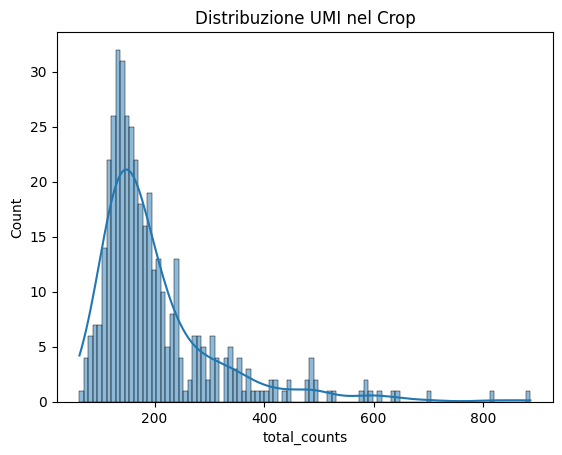

In [81]:
import seaborn as sns
sns.histplot(adata.obs["total_counts"], bins=100, kde=True)
plt.title("Distribuzione UMI nel Crop")
plt.show()

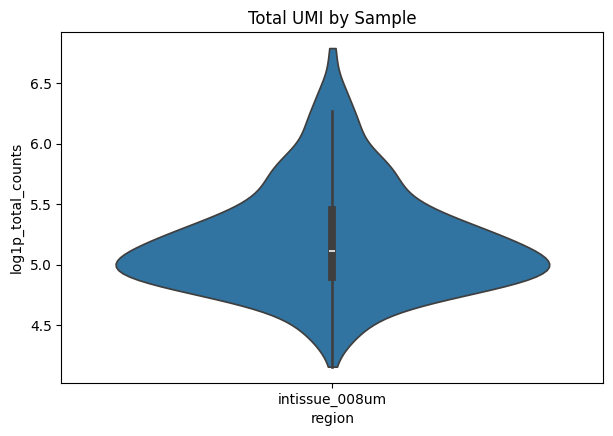

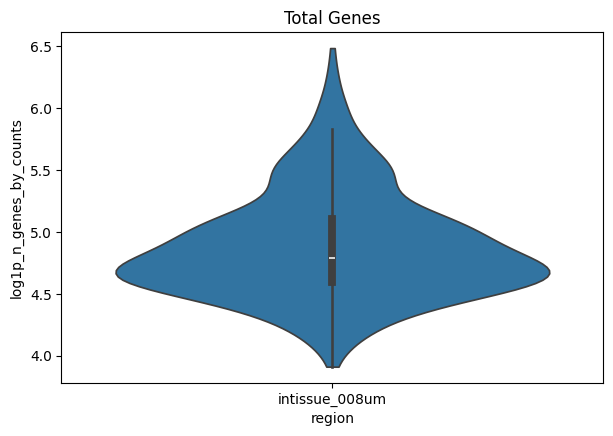

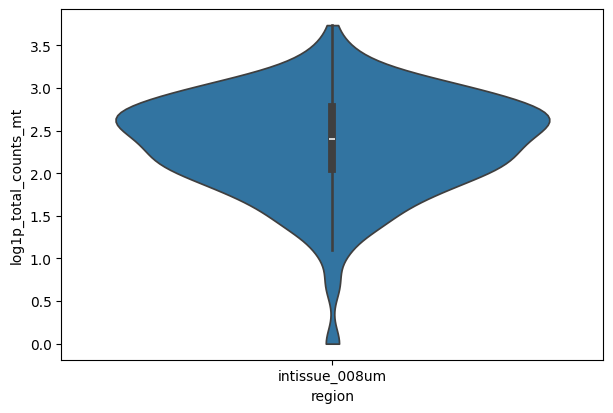

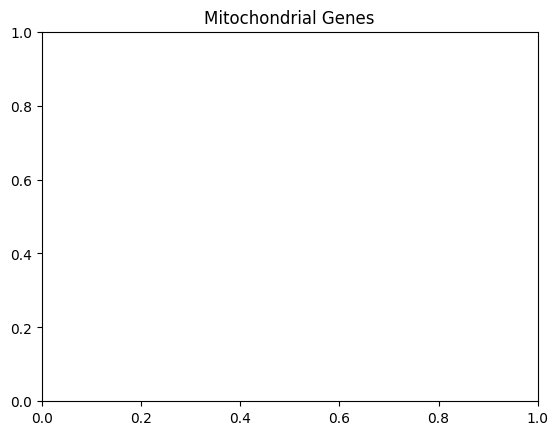

In [94]:
# Visualization for QC
sc.pl.violin(adata=adata, keys=["log1p_total_counts"], stripplot=False, inner="box",show=False, groupby="region")
plt.title("Total UMI by Sample")
plt.show()

sc.pl.violin(adata=adata, keys=["log1p_n_genes_by_counts"], stripplot=False, inner="box",show=False, groupby="region")
plt.title("Total Genes")
plt.show()

sc.pl.violin(adata=adata, keys=["log1p_total_counts_mt"], stripplot=False, inner="box", groupby="region")
plt.title("Mitochondrial Genes")
plt.show()



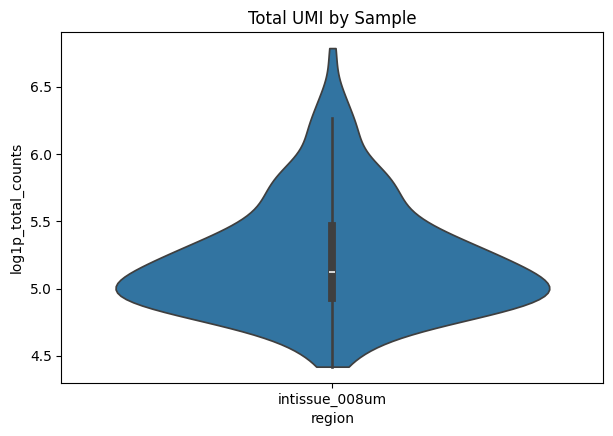

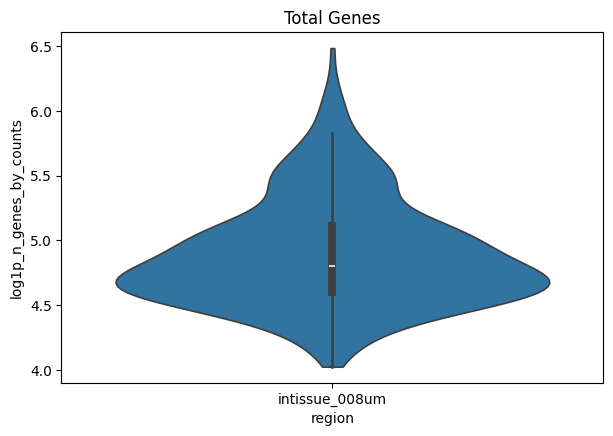

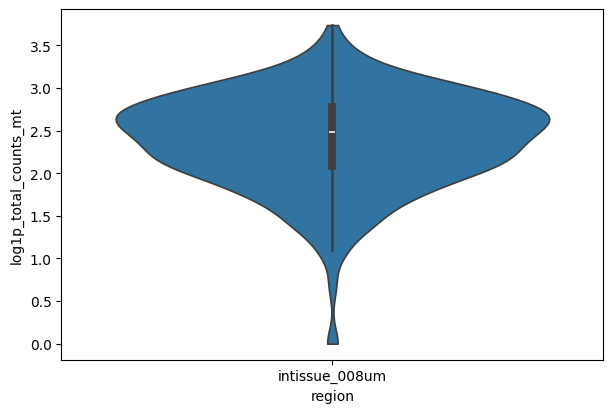

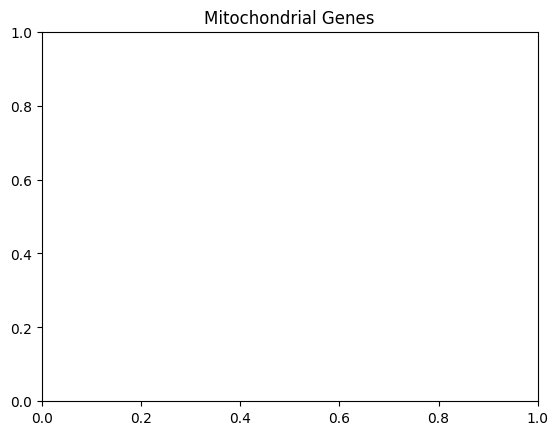

NameError: name 'gc' is not defined

In [99]:
#estimanting the cutoff
min_counts = np.expm1(4).astype("int") #expm1=e^x-1, exclude the bins with number of UMI<53
max_counts = np.expm1(8)# exclude the bins with number of UMI>2979

# Filtering genes and cells
sc.pp.filter_genes(adata, min_cells=50)
sc.pp.filter_cells(adata, min_counts=min_counts)
sc.pp.filter_cells(adata, max_counts=max_counts)

# Visualization for QC
sc.pl.violin(adata=adata, keys=["log1p_total_counts"], stripplot=False, inner="box",show=False, groupby="region")
plt.title("Total UMI by Sample")
plt.show()

sc.pl.violin(adata=adata, keys=["log1p_n_genes_by_counts"], stripplot=False, inner="box",show=False, groupby="region")
plt.title("Total Genes")
plt.show()

sc.pl.violin(adata=adata, keys=["log1p_total_counts_mt"], stripplot=False, inner="box", groupby="region")
plt.title("Mitochondrial Genes")
plt.show()

# storing filtered counts
adata.layers["filtered_counts"] = adata.X.copy()


del max_counts, min_counts
#gc.collect()

#

# Data Normalization and Dimensionality Reduction
Now that the SpatialData object is filtered, we normalize the filtered counts and perform Principal Component Analysis (PCA) for dimensionality reduction using Scanpy's normalize_total, log1p, and pca preprocessing functions. Before running PCA, there is an option to identify highly variable genes using Scanpy's highly_variable_genes function, so that only these genes are used in the PCA. However, in practice, we prefer to use the entire gene set. You may wish to find highly variable genes and use them in your own analysis. 

In this analysis, we set the target_sum to None, so that after normalization, each cell segmentation bin has a total UMI count equal to the median of the total UMI count for all cell segmentation bins before normalization. By default, Scanpy’s pca function generates the first 50 principal components (PCs). The normalization and dimensionality reduction steps are performed on the SpatialData object without copying the AnnData object. The results are stored directly within the sdata_concatenate object as the adata variable is linked to it.

In sintesi:
The normalization level the total quantity of RNA but preserve the proportion between genes

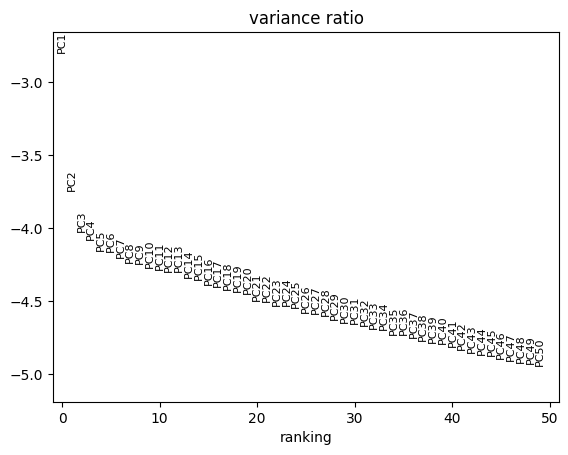

CPU times: user 5.78 s, sys: 47.5 ms, total: 5.83 s
Wall time: 2.1 s


In [111]:
%%time
sc.pp.normalize_total(adata, target_sum=None)
sc.pp.log1p(adata)
sc.tl.pca(adata)

adata.write("preprocessed_adataa.h5ad")

#elbow plot
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=50)

# Clustering and UMAP Visualization
Now that we have standardized the data and performed a PCA, we will cluster and visualize the results. Scanpy's neighbors function generates a neighbor distance matrix and a neighborhood graph, which is used by Scanpy's leiden function to cluster the data. Finally, Scanpy’s umap function is used to visualize the results.

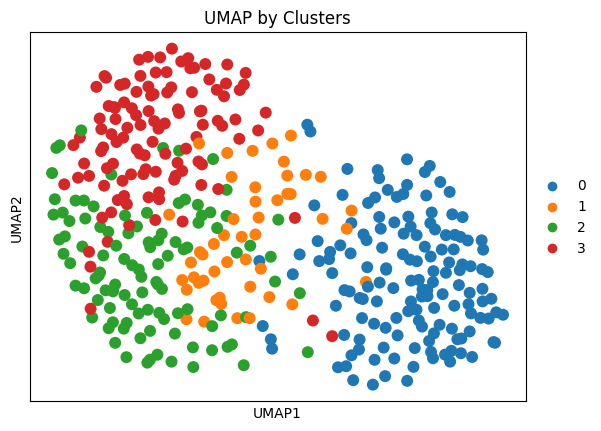

CPU times: user 1.2 s, sys: 10.6 ms, total: 1.21 s
Wall time: 733 ms


In [132]:
%%time

# neighborhood and clustering resolution
RES = 0.8 # clustering resolution
NEIGHBORS = 10  # number of neighbors

MIN_DIST=0.5 #default 0.5
SPREAD=2 #default 1

sc.pp.neighbors(adata, n_neighbors=NEIGHBORS, use_rep="X_pca",metric="correlation")
sc.tl.leiden(adata, flavor="igraph", key_added="clusters", resolution=RES,random_state=0)

#plot UMAP
sc.pl.umap(adata, color=["clusters"], title="UMAP by Clusters")




# Spatial Visualization of Clusters
Now that we have clustered the data, the next step is to annotate the clusters. We begin by visualizing the clusterin results directly on the mricscope image.

In [133]:
sdata_cropped

SpatialData object
├── Images
│     ├── 'blocco1_hires_image': DataArray[cyx] (3, 133, 132)
│     ├── 'blocco1_lowres_image': DataArray[cyx] (3, 13, 13)
│     └── 'fluo_image': DataTree[cyx] (3, 500, 500), (3, 250, 250), (3, 125, 125), (3, 63, 62)
├── Shapes
│     ├── 'blocco1_square_008um': GeoDataFrame shape: (424, 2) (2D shapes)
│     ├── 'blocco1_square_016um': GeoDataFrame shape: (121, 1) (2D shapes)
│     ├── 'intissue_008um': GeoDataFrame shape: (424, 3) (2D shapes)
│     └── 'intissue_poly': GeoDataFrame shape: (1, 5) (2D shapes)
└── Tables
      ├── 'filtered': AnnData (424, 32285)
      ├── 'final_table': AnnData (424, 32285)
      ├── 'square_008um': AnnData (404, 182)
      └── 'square_016um': AnnData (121, 32285)
with coordinate systems:
    ▸ 'blocco1', with elements:
        blocco1_hires_image (Images), blocco1_lowres_image (Images), fluo_image (Images), blocco1_square_008um (Shapes), blocco1_square_016um (Shapes), intissue_008um (Shapes), intissue_poly (Shapes)
    ▸ '

/home/stefar/Documents/Spatial Transcriptomic/.venv/lib/python3.11/site-packages/spatialdata_plot/pl/utils.py:872: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_mapping)


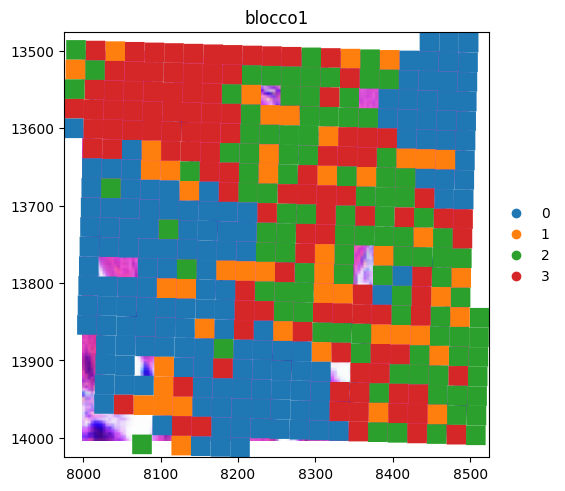

In [138]:
sdata_cropped.pl.render_images("blocco1_hires_image").pl.render_shapes("intissue_008um", color="clusters").pl.show(coordinate_systems="blocco1")

/home/stefar/Documents/Spatial Transcriptomic/.venv/lib/python3.11/site-packages/spatialdata_plot/pl/utils.py:872: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_mapping)


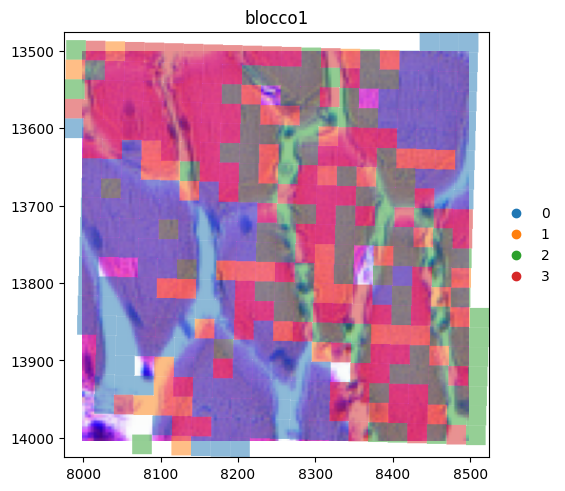

In [145]:
#colored bins cover all the image, so i try to use transparent bins
sdata_cropped.pl.render_images("blocco1_hires_image") \
    .pl.render_shapes(
        "intissue_008um", 
        color="clusters", 
        fill_alpha=0.5,   # Prova un valore molto basso come 0.2 o 0.3
        outline=True     # Togliamo il bordo per ora, così non "sporca" l'immagine
    ).pl.show(coordinate_systems="blocco1")

In [146]:


# 1. Calcoliamo i geni marker per ogni cluster
sc.tl.rank_genes_groups(adata, groupby='clusters', method='wilcoxon')

# 2. Vediamo i top 5 geni per ogni cluster in una tabella
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
import pandas as pd
markers_df = pd.DataFrame(
    {group: result['names'][group][:5] for group in groups}
)
print(markers_df)

       0        1        2       3
0  Pvalb     Myh1     Myh1    Myh2
1   Myh4    Ckmt2   mt-Co2    Fhl1
2  Actn3     Car3       Mb   Ckmt2
3  Mylpf  Ndufb10   mt-Nd1  Mybpc1
4  Tnni2      Des  mt-Cytb    Mdh1


In [160]:
adata.var

,gene_ids,feature_types,genome,mt,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,n_cells
Ankrd23,ENSMUSG00000067653,Gene Expression,mm10,False,205,0.792453,0.583585,51.650943,336.0,5.820083,205
Cox5b,ENSMUSG00000061518,Gene Expression,mm10,False,56,0.153302,0.142629,86.792453,65.0,4.189655,56
Acadl,ENSMUSG00000026003,Gene Expression,mm10,False,75,0.200472,0.182715,82.311321,85.0,4.454347,75
Myl1,ENSMUSG00000061816,Gene Expression,mm10,False,204,0.714623,0.539193,51.886792,303.0,5.717028,204
Des,ENSMUSG00000026208,Gene Expression,mm10,False,212,0.780660,0.576984,50.000000,331.0,5.805135,212
...,...,...,...,...,...,...,...,...,...,...,...
mt-Nd3,ENSMUSG00000064360,Gene Expression,mm10,True,73,0.200472,0.182715,82.783019,85.0,4.454347,73
mt-Nd4l,ENSMUSG00000065947,Gene Expression,mm10,True,99,0.297170,0.260185,76.650943,126.0,4.844187,99
mt-Nd4,ENSMUSG00000064363,Gene Expression,mm10,True,149,0.452830,0.373514,64.858491,192.0,5.262690,149
mt-Nd5,ENSMUSG00000064367,Gene Expression,mm10,True,186,0.641509,0.495616,56.132075,272.0,5.609472,186
